## Project Planning (Individual)

Mari Yasui (20033791)

In [3]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Data Description, Analysis, and Visualisation 1 (Players file):

**Consists of 196 observations with 7 variables each:**

 - Player's experience in 5 levels (Pro, Veteran, Regular, Amateur, Beginner) (character): `experience`
 - Subscribe status (logical): `subscribe`
 - Player ID (character): `hashedEmail`
 - Play time in hours (double): `played_hours`
 - Player's name (character): `name`
 - Player's gender (character): `gender`
 - Player's age (integer): `Age`

**Issues found in this dataset:**
 - NA in Age
 - Might be too many observations with 0 play time

In [4]:
players_data <- read.csv("players.csv")

players_data |>
    slice(c(1:3, (n()-2):n()))

#players_data |>
#    nrow()

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<int>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


played_hours_mean,Age_mean
<dbl>,<dbl>
5.845918,21.13918


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


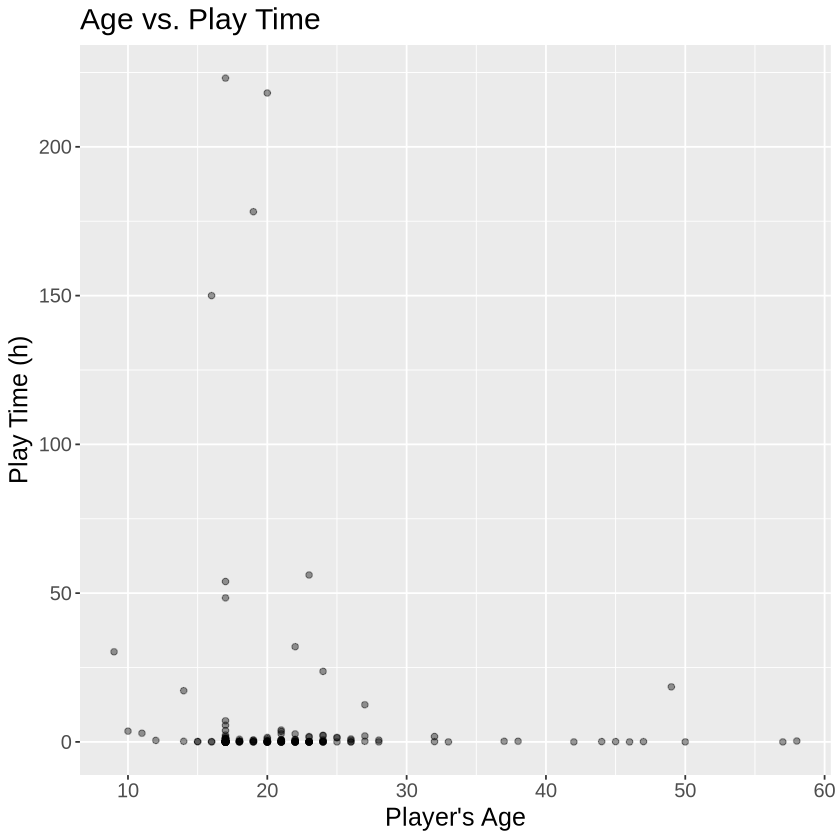

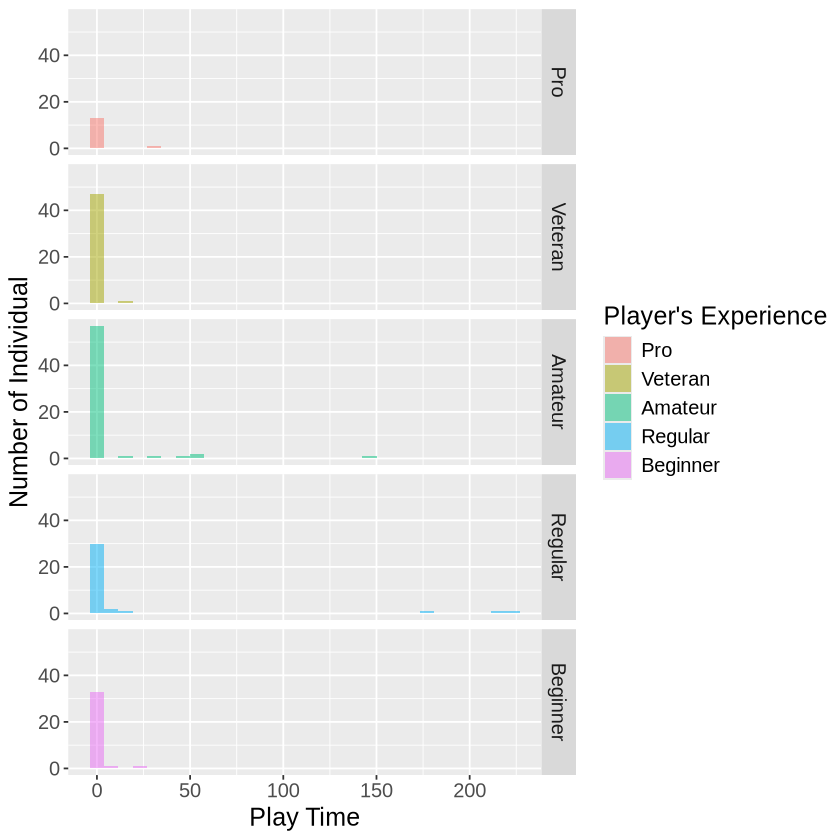

In [5]:
players_data <- players_data |>
                mutate(experience = as_factor(experience),
                      name = as_factor(name),
                      gender = as_factor(gender))

players_data |>
    summarise(played_hours_mean = mean(played_hours, na.rm = TRUE),
             Age_mean = mean(Age, na.rm = TRUE))

players_scatter <- players_data |>
                    select(Age, played_hours) |>
                    ggplot(aes(x = Age, y = played_hours)) +
                    geom_point(alpha = 0.4, na.rm = TRUE) +
                    labs(x = "Player's Age", y = "Play Time (h)", title = "Age vs. Play Time") +
                    theme(text = element_text(size = 15))
players_scatter

players_histogram <- players_data |>
                        select(played_hours, experience) |>
                        ggplot(aes(x = played_hours, fill = experience)) +
                        geom_histogram(alpha = 0.5, position = "identity") +
                        facet_grid(rows = vars(experience)) +
                        labs(x = "Play Time", y = "Number of Individual", fill = "Player's Experience") +
                        theme(text = element_text(size = 15))
players_histogram

Insight gained through visualisation:

I noticed that there are too many individuals with 0 play time. It might be better to exploude the individuals with 0.0 hours for their play time since there are certain amount of these people in each level of players.

## Data Description, Analysis, and Visualisation 2 (Sessions file):

**Consists of 1535 observations and 5 variables:**

 - Player ID (character): `hashedEmail`
 - Starting time (character): `start_time`
 - Ending time (character): `end_time`
 - Original starting time (double): `original_start_time`
 - Original ending time (double): `original_end_time`

**Issues found in this file:**

- The dataset is not tidy: some columns (`start_time`, `end_time`) have two types of data (date and time) in one cell
- Not sure how to tidy `start_time` and `end_time` column
- Not sure what the data in `original_start_time` and `original_end_time` column mean

In [7]:
sessions_data <- read.csv("sessions.csv")
sessions_data |>
    slice(c(1:3, (n()-2):n()))

#sessions_data |>
#    nrow()

hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


## Questions

**Broad**:
We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.

**Specific**:
Which variable(s) can be used to predict which player have long play time in hours in player.csv?

## Methods and Plan

To address my question of interest, I will use K-NN regression. This is because there might be more than one variable (explanatory variable) influencing the length of the play time (response variable) and I'm trying to make a model that predicts numerical response variable; therefore, K-NN regression suite the situation the best.

In this method, at the beginning, I will split the dataset into training set and testint set with the ratio of 75 to 25. In order to find which variable(s) influence the length of the play time of a player, I first need to use predictor selection algorithm, and to do so, I will use cross validation method by spliting the training set into 5 folds, after the original dataset is split into training and testing set.

**Assumptions**
 - Similar inputs have similar outputs
 - The data is sufficiently dense
 - Local neighbors are not too far from each other


**Limitation**
 - As the dataset gets larger, the process gets slower.
 - Prediction has to be within the range of testing dataset